# Some example outputs and instructions to the N-body simulation code. 

Hi, this section will show you some of the outputs from my N-body simulation code. At the end of this section, you may even be able to create your own universe. If you want to download the code and run it yourself, make sure you read the README file so you will know how the code work and the requirements for the code to run. If you are just here for fun and want to see some fun simulations of the universe, then buckle up, you are in for a ride. 

## Unit, unit and unit

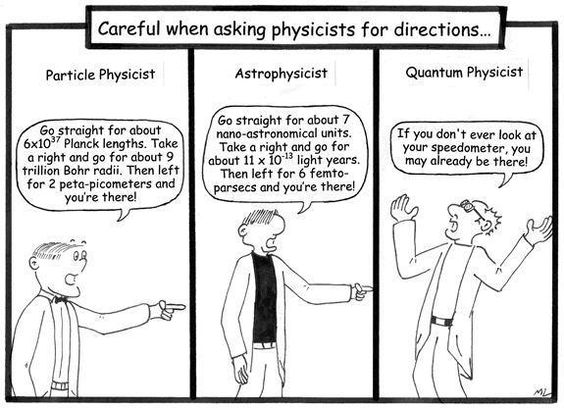

In [16]:
from IPython.display import Image
Image(filename='unit joke.jpg') 

Run the cell above to see the image. The image is obtained from https://www.pinterest.com.au/pin/90986854941568312/.

The most common system of units are the metric or imperial system. However, cosmologists work on very large scales. Therefore, it is difficult to express the mass or distance in the astronmy context with the usual system of units. Thus, astronomers and cosmologists have their own system of units. Here are some units that are commonly used in astronomy: 

Solar mass is the mass of our sun.

Parsec is a distance unit. 1 parsec is approximately three light years. 

In my simulation, the mass is in terms of 10^5 solar masses and the distance in the unit of kiloparsec. 

## Warning

The simulations from the code are very very rough approximation of motion of stars or galaxies in the universe. Want to see more accurate simulation? Check out the videos on this website https://wwwmpa.mpa-garching.mpg.de/galform/virgo/millennium/.  

## Two  body simulation

Why don't we start from something easy and make sure the code is producing the correct output. The simplest way to do that is to put two particles in the simulation and see how they interact with each other. The only force in my code is the gravitational force. The gravitational force is an attractive force, so we expect the two objects will come closer and closer to each other. Try to run the following code to see whether this is happening. 

In [3]:
%matplotlib inline

To modify the initial condition, please modify the code directly.
8.011648178100586


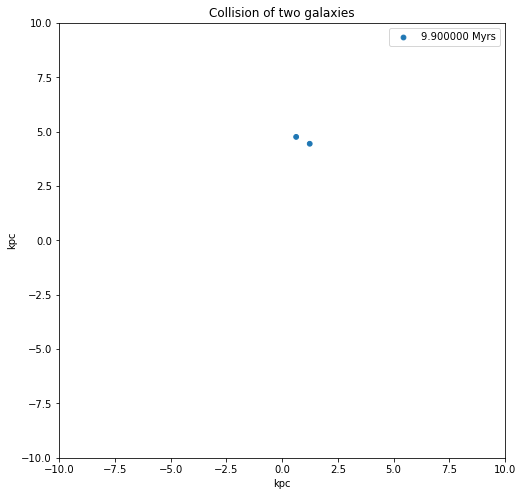

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import sys

from IPython.display import HTML


def find_particle(position, x, y, z):
    """

    Parameters
    ----------
    position : array_like 
    This is the position of all particles in the simulation.
    x : array_like
    The array contains the grid point in the x direction.
    y : array_like
    The array contains the grid point in the y direction.
    z : array_like
    The array contains the grid point in the z direction.

    Returns
    -------
    num : List
        Number of particles in each grid.
    particle_in_cell : List
        The index of particles in each grid cell.

    """
    particle_in_cell =[]
    num = []
    #Initialise the output list
    limit_x = len(x)-1
    limit_y = len(y)-1
    limit_z = len(z)-1
    #Number of computation requires for each dimension. 
    counter_x = 0
    counter_y = 0
    counter_z = 0
    #This counts the number of cells that have been computed in each direction. 
    for i in range(limit_x*limit_y*limit_z):
        position_x = position[0,:]
        position_y = position[1,:]
        position_z = position[2,:]
        #The poistion of the particle in each direction. 
        xx = np.where(position_x < x[counter_x+1], position_x, 0)
        yy = np.where(position_y < y[counter_y+1], position_y, 0)
        zz = np.where(position_z < z[counter_z+1], position_z, 0)
        #Find the particles in the position array which are to the right of the desired grid. For such particle 
        #replace the position with zero. 
        xxx = np.where(xx > x[counter_x], xx, 0)
        yyy = np.where(yy > y[counter_y], yy, 0)
        zzz = np.where(zz > z[counter_z], zz, 0)
        #Find the particles in the position array which are to the left of the desired grid. For such particle 
        #replace the position with zero.
        
        index_x = np.nonzero(xxx)[0]
        index_y = np.nonzero(yyy)[0]
        index_z = np.nonzero(zzz)[0]
        #Find the index of the particle which are nonzero. These particles are located in the desired grid. 
        #print(index_x, index_y, index_z)
            
        xy = np.intersect1d(index_x, index_y, assume_unique=True)
        xyz = np.intersect1d(xy, index_z, assume_unique=True)
        #The codes above finds the index of particle in the desired grid. The index in each array is unique. 
        if (len(xyz != 0)):
            num.append(len(xyz))
            particle_in_cell.append(xyz)
            #Append the particle in the grid and the number of particle in the grid if the number of particles in
            #the grid is nonzero. 
            
        counter_x += 1
        #Move to the grid at the right
        if (counter_x == limit_x):
            #This means it completes calculate the particles in the grid in a row. Advance to the next row. 
            counter_x = 0
            counter_y += 1
        if (counter_y == limit_y):
            #This moves to the next layer of the xy-plane. 
            counter_y = 0
            counter_z += 1
    return num, particle_in_cell
                
def apply_boundary(p, Nd, Np):
    """
    

    Parameters
    ----------
    p : array_like
        Position of all particle in the array.
    Nd : int
        Number of dimensions of the simulation.
    Np : int
        Number of particles in the simulation.

    Returns
    -------
    p : array_like
        The position of particles after applying the boundary condition.

    """
    # Modify to apply your chosen boundary conditions
    
    position_x = p[0,:]
    position_y = p[1,:]
    position_z = p[2,:]
    #The position of particles in the x, y and z position. 
    
    #The following lines will find the particle outside the simulation and move it back to the simulation
    #based on the periodic boundary condition.
    xx = np.where(position_x > x_bound, (position_x-x_bound)-x_bound, position_x)
    xxx = np.where(xx < -x_bound, x_bound - (-x_bound - xx), xx)
    yy = np.where(position_y > y_bound, (position_y-y_bound)-y_bound, position_y)
    yyy = np.where(yy < -y_bound, y_bound - (-y_bound - yy),yy)
    zz = np.where(position_z > z_bound, (position_z-z_bound)-z_bound, position_z)
    zzz = np.where(zz < -z_bound, z_bound - (-z_bound - zz), zz)
    
    p = np.concatenate((xxx, yyy, zzz), axis = 0)
    p = np.reshape(p, (Nd, Np))
    #Reconstruct the array for position of particles. 
    return p

def center_of_mass(particle_in_cell, num, mass, position):
    """
    

    Parameters
    ----------
    particle_in_cell : List
        The list that contain the index of particles in each grid cell.
    num : List
        The list contains the number of particles in each grid cell. 
    mass : array_like
        The mass of all the particles.
    position : array_like
        The position of all the partiles.

    Returns
    -------
    result : List
        The center of mass position in each grid cell.
    total_mass : List
        The total mass of all particles in each grid cell.

    """
    result = []
    total_mass = []
    #Initialise the output lists
    position_x = position[0,:]
    position_y = position[1,:]
    position_z = position[2,:]
    
    for i in range(len(particle_in_cell)):
        COM_x = 0.0
        COM_y = 0.0
        COM_z = 0.0
        M_total = 0.0
        #Initialise the center of mass position and the total mass of particles in the grid
        for j in range(num[i]):
            COM_x += mass[particle_in_cell[i][j]]*position_x[particle_in_cell[i][j]]
            COM_y += mass[particle_in_cell[i][j]]*position_y[particle_in_cell[i][j]]
            COM_z += mass[particle_in_cell[i][j]]*position_z[particle_in_cell[i][j]]
            M_total += mass[particle_in_cell[i][j]]
            #Calculate the center off mass
        result.append(np.array([COM_x/M_total, COM_y/M_total, COM_z/M_total]))
        total_mass.append(M_total)
    return result, total_mass

def position2grid(particle_index, particle_in_cell):
    """
    

    Parameters
    ----------
    particle_index : array_like
        Index of all particles in the simulation.
    particle_in_cell : List
        The index of particle in each grid cell.

    Returns
    -------
    result : List
        It matches the index of particle to the index of the grid it is in.

    """
    result = []
    for i in range(len(particle_index)):
        for j in range(len(particle_in_cell)):
            size = (np.intersect1d(np.array([i]), particle_in_cell[j]))
            #Determine whether the particle is in the grid[j]
            if (size.size > 0):#If the particle is in grid[j], the size of the array will be nonzero. 
            #Since the index of particle is also unique, we are certain that when the size of array is not zero. 
            #we find the cell of which the particle is in
                break
        result.append(np.array([i,j]))
    return result

def accel_grid(COM, total_mass, mass, index, p, particle, particle_in_cell, num, grid_length, smooth):
    """
    

    Parameters
    ----------
    COM : List
        Center of mass of all grid cells.
    total_mass : List
        Mass of all particles in a single grid cell.
    mass : array_like
        The mass of each individual particle.
    index : int
        The index of the grid cell.
    p : array_like
        Position of all the particle.
    particle : int
        Index of the particle.
    particle_in_cell : List
        The list contains the index of particles in each grid cell.
    num : List
        Number of particles in each grid cell.
    grid_length : The length of the gridcell
        A reference length. If the distance between particle and center of mass of any grid is below the 
        reference length. We will calulate the interaction in particle-particle basis (similar to P3M).

    Returns
    -------
    float
        The acceleration in the x-direction.
    float
        The acceleration in the y-direction.
    float
        The acceleration in the z-direction.

    """
    G = 4.452*10**(-7)  #in unit of kpc^3/10^5 solar masses/Myr^2
    smooth_grid = grid_length #The smoothen scale which is set to length of the grid. 
    
    accel_x = 0.0
    accel_y = 0.0
    accel_z = 0.0
    
    for i in range(len(COM)):
        r_dash = np.sqrt((COM[i][0]-p[0, particle])**2 + (COM[i][1]-p[1, particle])**2 + (COM[i][2]-p[2,particle])**2)
        #The distance between the particle and the center of mass of particles.               
        if (r_dash <= grid_length):
            #If less than the grid size, calculate the force using individual particle.
            accel_x += accel_particle(p, particle, mass, i, particle_in_cell, smooth)[0]
            accel_y += accel_particle(p, particle, mass, i, particle_in_cell, smooth)[1]
            accel_z += accel_particle(p, particle, mass, i, particle_in_cell, smooth)[2]
        else:
            #Larger than the gridsize, calculate the force with center of mass.
            r = np.sqrt((COM[i][0]-p[0, particle])**2 + (COM[i][1]-p[1, particle])**2 + (COM[i][2]-p[2,particle])**2 + smooth_grid**2)
            accel_x += G*total_mass[i]*(COM[i][0]-p[0, particle])/r**3
            accel_y += G*total_mass[i]*(COM[i][1]-p[1, particle])/r**3
            accel_z += G*total_mass[i]*(COM[i][2]-p[2, particle])/r**3
    return accel_x, accel_y, accel_z

#Acceleration of the particles
def accel_particle(p, particle, mass, index, particle_in_cell, smooth):
    """
    

    Parameters
    ----------
    p : array_like
        The psition of all particles.
    particle : int
        The index of the particle.
    mass : array_like
        The mass of all particles.
    index : int
        The index of the grid of which the particle is in.
    particle_in_cell : List
        The index of particles in each grid cell.

    Returns
    -------
    float
        The acceleration in the x-direction.
    float
        The acceleration in the y-direction.
    float
        The acceleration in the z-direction.

    """
    G = 4.452*10**(-7)  #in unit of kpc^3/10^5 solar masses/Myr^2
    #smooth = 1.0 #The smoothen scale is 100 pc which is bigger than the size of globular cluster (around 0.01 kpc, smallest possible
    #mass) and the size of a dwarf galaxy (around 1 kpc, largest possible mass)
    
    accel_x = 0.0
    accel_y = 0.0
    accel_z = 0.0
    
    total = particle_in_cell[index]
    #This is the collection of all particles in a specific grid. 
    
    for i in range(len(total)):
        if (total[i] != particle):
            #Calculate the force on the particle individually. 
            r = np.sqrt((p[0,total[i]]-p[0, particle]+smooth)**2 + (p[1,total[i]]-p[1, particle]+smooth)**2 + (p[2,total[i]]-p[2,particle]+smooth)**2)
            accel_x += G*mass[total[i]]*(p[0,total[i]]-p[0, particle])/r**3
            accel_y += G*mass[total[i]]*(p[1,total[i]]-p[1, particle])/r**3
            accel_z += G*mass[total[i]]*(p[2,total[i]]-p[2, particle])/r**3
            
    return accel_x, accel_y, accel_z

def acceleration(p, num, Np, mass, smooth):
    """
    

    Parameters
    ----------
    p : array_like
        Position of all particles.
    num : List
        The number of particle in each grid.
    Np : int
        Total number of particles.
    mass : array_like
        The mass of each particle.

    Returns
    -------
    float
        The acceleration in the x-direction.
    float
        The acceleration in the y-direction.
    float
        The acceleration in the z-direction.

    """
    G = 4.452*10**(-7)  #in unit of kpc^3/10^5 solar masses/Myr^2
    smooth = 1.0 #The smoothen scale is 100 pc which is bigger than the size of globular cluster (around 0.01 kpc, smallest possible
    #mass) and the size of a dwarf galaxy (around 1 kpc, largest possible mass)
    accel_x = 0.0
    accel_y = 0.0
    accel_z = 0.0
    for i in range(Np):
        if (i != num):
            r = np.sqrt((p[0,i]-p[0, num])**2 + (p[1,i]-p[1, num])**2 + (p[2,i]-p[2,num])**2 + smooth**2)
            accel_x += G*mass[i]*(p[0,i]-p[0, num])/r**3
            accel_y += G*mass[i]*(p[1,i]-p[1, num])/r**3
            accel_z += G*mass[i]*(p[2,i]-p[2, num])/r**3
    return accel_x, accel_y, accel_z

def recession_vel(position, H_0):
    v_rec = position*Hubble_convert(H_0) #return the recession velocity in kpc/Myr
    return v_rec

def Hubble_convert(H_0):
    result = H_0*1000.0*3.1536*10**13/(3.09*10**16)/10**6 #This formula convert the Hubble parameter from
    #km/s/Mpc to Myr^-1 in order to match the unit convention in this program
    return result

#Basic user interface. Ask the user to input the following parameter
print('To modify the initial condition, please modify the code directly.')
# mass_min = eval(input("The minimum nonzero resolution mass (in 10^5 solar masses): "))
# mass_max = eval(input("The maximum mass of the dark matter halo (in 10^5 solar masses): "))
# bound_xy = eval(input("The length of simulation in the xy plane (in kpc): "))
# bound_z = eval(input("The length of simulation in the z direction (in kpc): "))
# method = eval(input("Evaluation method, enter 0 for grid approximation and 1 for exact solution: "))
# grid_xy = eval(input("Total number of grids in the x or y position: "))
# grid_z = eval(input("Total number of grids in the z direction: "))
# Np = eval(input("Total number of particles: "))
# Nt = eval(input("Total number of time steps: "))
# dt = eval(input("Time step (in Myr): "))
# v_max =  eval(input("The maximum drift velocity (in kpc/Myr): "))
# H_0 = eval(input("The Hubble parameter (in km/s/Mpc). For static universe, enter 0.0: "))

mass_min = 10**4
mass_max = 10**5
bound_xy = 10
bound_z = 10
method = 1
grid_xy = 5
grid_z = 5
Np = 2
Nt = 100
dt = 0.1
v_max = 0.2/np.sqrt(3.0)
H_0 = 70
smooth = 1

if (method == 0):
    text = 'Grid'
elif (method == 1):
    text = 'Exact'

t0 = time.time()
# For reproducibility, set a seed for randomly generated inputs. Change to your favourite integer.
np.random.seed(4080)

# Set the number of spatial dimensions (at least 2)
Nd = 3

#The array that contains the index of the particles.
particle_index = np.arange(Np)

# Set how long the animation should dispay each timestep (in milliseconds).
frame_duration = 100


#boundary for x, y and z
x_bound = bound_xy
y_bound = bound_xy
z_bound = bound_z

# Set initial positions at random within box
# position_xy = (np.random.normal(loc = 0.0, scale = 4, size = (2, Np)))
# #position_xy = (1.0-2.0*np.random.random(size = (2, Np)))*bound_xy/2
# #Gaussian initial condition in the xy plane.
# position_z = (1.0-2.0*np.random.random(size = (1, Np)))*z_bound
# #Random distribution in the z direction.

#This gives the initial condition
#position = np.concatenate((position_xy, position_z), axis = 0)
position = np.random.normal(loc = 0.0, scale = 2, size = (Nd, Np))
#position = (1.0-2.0*np.random.random(size=(Nd,Np)))*x_bound/2
#position = apply_boundary(position, Nd, Np)
#position_1 = np.random.normal(loc = -15.0, scale = 5, size = (3, 100))
#position_2 = np.random.normal(loc = 15.0, scale = 5, size = (3, 100))

#position = np.concatenate((position_1, position_2), axis = 1)

mass = 10**(np.random.random(size=(Np))*(np.log10(mass_max)-np.log10(mass_min)) + np.log10(mass_min)) 
#The mass range of dark matter halos. The minimum and maximum mass is determined by the user.
 
#velocity = np.random.normal(loc=0.0, scale = 0.03, size = (Nd, Np))
velocity = (1.0-2.0*np.random.random(size = (Nd, Np)))*v_max
#velocity_1 = np.full((Nd, 100), v_max)
#velocity_2 = np.full((Nd, 100), -v_max)
#velocity = np.concatenate((velocity_1, velocity_2), axis = 1)
#velocity = np.zeros((Nd, Np))
#print(velocity)

position += velocity/2.0*dt #first step of Leapfrog method. 

position = apply_boundary(position, Nd, Np)#Apply the periodic boundary condition

position_new  = np.reshape(np.concatenate((position[0,:], position[1,:])), (2, Np)).T
#Position_new is a 2xNp matrix. The first column is the x position of particles and the second column
#is the y position. 

#print(position_new[:,0])

gridsize = np.array([grid_xy,grid_xy,grid_z])
#This array contains the number of grids in each direction.

x = np.linspace(-x_bound, x_bound, gridsize[0]+1)
y = np.linspace(-y_bound, y_bound, gridsize[1]+1)
z = np.linspace(-z_bound, z_bound, gridsize[2]+1)
#x, y and z are the grid in each direction.

grid_length = np.sqrt(((x[1]-x[0])/2)**2 + ((y[1]-y[0])/2)**2 + ((z[1]-z[0])/2)**2)
#The length of the grid. 

# Set the axes on which the points will be shown
plt.ion() # Set interactive mode on
fig = plt.figure(figsize=(8,8)) # Create frame and set size
ax = plt.axes() # Set the axes as the only set (you may wish to change this later)
ax.set_xlabel('kpc')
ax.set_ylabel('kpc')
ax.set_title('Collision of two galaxies')

# Create command which will plot the positions of the particles
scat = plt.scatter(position_new[:,0], position_new[:,1], s= (np.log10(mass))**2)
#This is a scatter plot. It takes in column vector of x and y position. s is the size of the particle which depends 
#on the mass of the particle. 

# Define procedure to update positions at each timestep
def update(i):
    global position,velocity, mass, Nd, Np, particle_index, method, H_0 # Get positions and velocities, mass, 
    #number of particles, index of particles and the method of evaluation. 

    year = i*dt #Shows how many year has passed since the initial condition. 
    #points.set_label('%lf Myrs'%year)
    scat.set_label('%lf Myrs'%year)
    
    num, particle_in_cell = find_particle(position, x, y, z)#This returns the index of particles in each grid
        #and the number of particles in each grid.
    COM, total_mass = center_of_mass(particle_in_cell, num, mass, position)
        #This returns the center of mass, and the total mass in each grid. 
    index = position2grid(particle_index, particle_in_cell)#This maps the particle index to the grid it is in.
    
    accel = np.zeros(shape = position.shape)#The acceleration of the particle. 
    if (method == 0):
        for i in range (Np):
            particle = i #The index of the particle. 
            grid_index = index[i][1] #The index of the grid. 
            accel[0,i], accel[1,i], accel[2,i] = accel_grid(COM, total_mass, mass, grid_index, position, particle, particle_in_cell, num, grid_length, smooth)
            #This gives the acceleration of the particle with the grid method
            
    elif (method == 1):
        for i in range(Np):
            accel[0, i], accel[1, i], accel[2, i] = acceleration(position, i, Np, mass, smooth)
            #This returns the acceleration of the particle with the exact method. 
            
    else:
        sys.exit("Invalid input for method of simulation.")
            
    velocity += accel*dt #Calculate the new velocity with Euler's method. 
    #print(position[:,35])
    position += (velocity+recession_vel(position,H_0))*dt # Increment positions according to their velocites
    #print(accel[:,35])
    position = apply_boundary(position, Nd, Np) # Apply boundary conditions
    ax.set_xlim(-x_bound-x_bound*Hubble_convert(H_0)*year,x_bound+x_bound*Hubble_convert(H_0)*year)  # Set x-axis limitslpitns,
    ax.set_ylim(-y_bound-y_bound*Hubble_convert(H_0)*year,y_bound+y_bound*Hubble_convert(H_0)*year)  # Set y-axis limits
    scat.set_offsets(np.reshape(np.concatenate((position[0,:], position[1,:])), (2, Np)).T)#This line of code basically
    #combine the array of x and p position and then transpose it. This is because the scatter plot only accepts 
    #column vector of x and y position. 
    
    plt.legend()#Display the time in the lower right corner. 
    return scat, 
    
# Create animation
# https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html
plt.rcParams['animation.ffmpeg_path'] = "./ffmpeg/bin/ffmpeg.exe"

ani = animation.FuncAnimation(fig, update, frames=Nt,interval = frame_duration, blit = True)

FFwriter = animation.FFMpegWriter()

ani.save("twobody.mp4", writer = FFwriter)

t1 = time.time()
print(t1-t0) #Prints out the time require to complete the simulation. 
plt.show()

Run the cell below to see the video. 

In [2]:
from IPython.display import Video

Video("twobody.mp4")

Looks like the gravity is working properly, you can see the two particles are getting closer closer together overtime. Let's move on to our next demonstration. 

## How are the galaxies formed???

You may have heard of the cosmological principle that states the universe is satistically homogeneous (same property in all position) and isotropic (same property in all direction). This means on large scale, particles are just randomly distributed in space. However, how galaxies which has a much higher density than the average density of the universe form? It turns out since the gravitational force are attarctive, if the density of a region is much higher than the average density of the universe. The particles will begain cluster together and form structures. The next video will show how this happens. 

### Remark

This section is meant to be interactive. However, this is my first time using Jupyter notebook and I don't want to add a 600 line code cell each time to generate the simulation. Therefore, if you want to generate the video yourself, just go the the python code above and change some initial conditions. The inital condition for the next video is (just change these parameters and leave other parameters the same):

position = (1.0-2.0*np.random.random(size=(Nd,Np)))*x_bound/2

velocity = np.random.normal(loc=0.0, scale = 0.1, size = (Nd, Np))

Np = 100

bound_xy = 20 

bound_z = 20

dt = 0.5

In [2]:
from IPython.display import Video

Video("gravitational collapse.mp4")

Initially, the particles are distributed randomly on from -10 kpc to 10 kpc in each direction with zero peculiar velocity. Then we can see due to the graviational effect, all particles start to fall inwards into the center. This is because particles that are close together will first start to cluster together which increases the density in that region. From Newton's law of gravity, larger mass lead to a stronger gravitational force. Therefore, other particles that are initially far away starts to feel the force and pull to the cluster of mass. This feedback loop continues until all partciles are pulled towards the center of mass of the system. When some particle with smaller mass travel close to the center of the galaxy, it will get a huge boost in velocity accouting to Newton's law of gravity. Consequently, it is being flung out the galaxy. 

### Initial conditions

Some of you may try to input different initial conditions and find out the video you get is totally different from the one I have shown here and maybe wondering how do I know which initial condition to use to produce this kind of simulation. There are some general tricks to choose an initial condition. Let's take the simulation above as an example. 

A typical size of galaxies are around tens of kiloparsecs. For example, the diameter of the Milky way is around 32 kiloparsecs. The initial distribution of particles has a diameter around 20 kiloparsecs which is similar to the size of the normal galaxy. 

Another component in Newton's law of gravity is the mass of the particle. The total mass of the particle in the simulation above is around 500 billion solar masses, which is also a typical mass for a galaxy. The mass of particle is different. If the size of the particle is bigger, it means the particle has a bigger mass.  

The soften length is a parameter which determine the scale of which the simulation is no longer able to resolve. I determine the soften length from the typical size of the maximum particle possible in the simulation. For example, the maximum mass possible in the above simulation is 10 billion solar masses which is a typical mass of a dwarf galaxy. The typical length of the dwarf galaxy is around 1 kiloparsec, so the soften length is chosen to be 1 kiloparsec. 

A general rule of thumb for the time step is the ratio between the soften length and the typical velocity of particles.

## Particles???

Some of you may wonder what is the physical representation of the particle in the simulation. In reality, they are dark matter halos. The dark matter halos are cosmological structures in the universe that are decoupled from the expansion of the universe  and the matter inside are bound by gravity. 

## How do we know dark matter exist ???

As you may have heard, dark matter does not interact with light so they are not visible to us, so how do we know dark matter exist. Well, we know the amount of luminous (baryonic) matter density is about 10 % of the dark matter density. Why don't we reduce the mass of the dark matter halo to 10% of its original mass and see what happen. 

Initial conditions:
The same initial condition as the galaxy formation simulation except set mass_min and mass_max to 10 % of its original value. 

In [4]:
from IPython.display import Video

Video("gravitational collpase baryon only.mp4")

As you can see from the video above, the particles do not cluster together as in the previous video. Consequently, the galaxy is not formed in this simulation. This shows baryon alone is not able to form galaxies. There are exotic matters that have mass but not interact with light in order for galaxies to form. This is one of the strongest evidence that support the dark matter theory. 

Well, what if the density of baryon in some regions is so high so it may be able to form a galaxy in the first place? The next video will show even that's the case, particles will soon disperse. 

Inital conidtions:

position = np.random.normal(loc = 0.0, scale = 4, size = (Nd, Np))

velocity = (1.0-2.0*np.random.random(size = (Nd, Np)))*v_max

The inital position changes from a random distribution to a Gaussian distribution since most stars are concentrated in the buldge area and the outskirts of galaxy contain fewer stars. I choose the initial velocity profile to be random which is not a very accurate representation of velocities of stars in the galaxy. This is due to the velocity of stars in the galaxy is hard to model. The maximum velocity of particle in the simulation is 0.2 kpc/Myr which is around 200 km/s similar to the velocity of stars around the disk of the Milky way. 

In [5]:
from IPython.display import Video

Video("galaxy baryon only.mp4")

# Expanding universe

The universe is undergoing a period of accelerating expandsion due to the mysterious dark energy. In order to incorperate the expansion of the universe into the simulation, the velocities the particles have two components. The peculiar velocity due to the gravitational interaction with other particles in the simulation and the recession velocity due to the expansion of the universe. We can determine the recession velocity by multiplying the Hubble constant with the distance of the particle to the observer. In the simulation, we assume the observer is located at the origin. In the kiloparsec scale, the effect of recession velocity on the motion of the stars is neglectable. However, the recession velocity becomes important when we do a simulation on the scale of megaparsec. The following video shows the motion of galaxies in a galaxy cluster which size is usually on the order of megaparsec.

Initial conditions:

mass_min = 10**8

mass_max = 10**9

velocity = np.zeros((Nd, Np))

bound_xy = bound_z = 10**4

position = (1.0-2.0*np.random.random(size=(Nd,Np)))*x_bound/2

smooth = 10**3

dt = 50

The typical mass of clusters are around 10**15 solar masses, so the min_mass and max_max are adjusted such that the total mass of particles in the simulation is around the same mass as the cluster. 

In [6]:
from IPython.display import Video

Video("galaxy cluster.mp4")

Initially the galaxies are randomly distributed, but after some time, the galaxies are pulled together due to the gravitational force and start to form galaxy clusters. The x and y axis are expanding due to the expansion of the universe. In this case, the gravitational force betweeen particles are so strong such that it defeats the expansion of the universe. Therefore, a galaxy cluster is able to form at the end. Galaxy clusters are the largest gravitational bound object in the universe.


# Grid approximation

All simulations above are produced using the exact solution with Newton's law of gravity. However, this process is time consuming since we have to calculate the force on one particle from all other particles and then repeat this for all particles. This means the total number of computation requires is on the order of $N_p^{2}$ where $N_p$ is the number of particles in the simulation. This is a bad news because it will take a significantly longer time to complete the simulation if we double the amount of particles in the simulation. My code tackles this problem with the grid approximation techniue which is a simplified version of the tree code. 

Firstly, like the tree code, the grid approximation method will first divide the simulation into a number of grid cells. However, in tree code, we stop dividing when their is only one particle in each grid. However, in the grid approximation method, the number of grids is given by the user. Then we calculate the center of mass of all grid cells and filter out the grid cell that has zero particles. Lastly, we compute the force on a particle by computing the force between the particle and the center of mass of other grid cells of the distance between the particle and the center of mass is larger than the size of the grid cell. Otherwise, we calculate the force between the particle and the particles in other grid cells.  

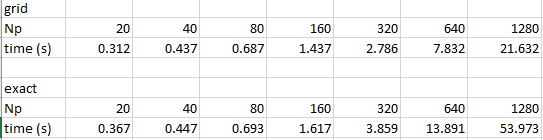

In [7]:
from IPython.display import Image
Image(filename='table.png')

THe table above demonstrates the amount of time require to run one frame of the simulation for the grid approxomation and the exact method. When the number of particles are less than 100, the grid approximation only takes slightly shorter time than the exact method to finish the simulation. However, this situtation changes drastically when the number of particles are larger than 100. At around 300 particles, the grid approximation only takes one second less than the exact method to finish the simulation. At around 1000 particles, the grid approximation now only takes around half of the time of the exact method to finish the simulation. 

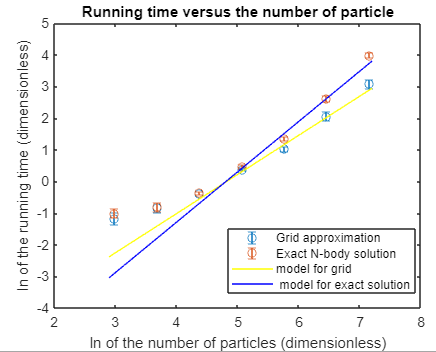

In [3]:
from IPython.display import Image
Image(filename='method comparison.png')

The figure above shows the logarithmic plot of the running time aginast the number of particles. the straight line is the linear regression model for each method. The linear regression model demonstrates the running time for the exact method is proportional to $N^{1.6 \pm 0.1}$ while the grid approximation method is proportional to $N^{1.2 \pm 0.1}$. Therefore, if you have a lot of particles in the simulation. The grid approximation method will run much quicker than the exact solution. Run the next two cell will show you the approximation method gives a very similar simulation to the exact method. The first video is the exact method and the second video is the approximation method. 

In [1]:
from IPython.display import Video

Video("gravitational collapse.mp4")

In [12]:
from IPython.display import Video

Video("gravitational collapse grid.mp4")

## Some tips

The running time for the grid approximation method depends on the number of cells in each direction and possibly the initial conditions. To achieve optimal efficiency, you can run the grid approximation for one frame and see which grid size gives the fastest running time. Typically 4 to 6 grids in each direction is enough if the number of particles is between one hundred to few thoudsands. 

# Galaxy statistics

We can obtain a lot of information about the universe from analysing the clustering of galaxies. In cosmology, there are two main two statistical quantities used to measure the degree of clustering of galaxies. One of them is the two-point correlation function and the other one is the power spectrum. The two-point correlation function is related to the power spectrum by Fourier transform. In our case, the two-point correlation function is measure in unit of distance while the power spectrum depends on the wavenumber which is proportional to the inverse of distance. The Fourier transform is just a mathematical transformation to link this two quantities together.

The two-point correlation function measure the excess (compare to random distribution) probability of finding distance of galaxy with distance r. In my simulation, the two point correlation is calculated through the Peebles-Hauser estimator: $$ \xi = \frac{DD(r)-RR(r)}{RR(r)} $$. 

The number of pairs separated by distance r in the dataset is denoted by DD(r) and RR(r) represents the number of pair separated by distance r in a random distributed data set. RR(r) can be determined analytically by: $$ RR(r) = \frac{N^2}{V} V_{shell}$$

The total number of particles in denoted by N, the volume of the simulation is denoted by V and the volume of the shell with size dr is denoted by $V_{shell}$. The power spectrum is related to the two-point correlation function by $$ P(k) = 2 \pi \int_{0}^{\infty} dr r^2 \frac{\sin{(k r)}}{k r} \xi(r) $$

The power spectrum is just the Fourier transform of the two-point correlation function. Hence, both the power spectrum and two-point correlation function gives the same information about the clustering of galaxies. In our case, the correlation function is discrete. There are two different ways to evaluate the power spectrum. The first method is to use the trapezoidal rule to calculate the power spectrum and the second way is to use an interpolation spline to calculate the power spectrum and then evaluate the integeal numerically.  